<a href="https://colab.research.google.com/github/diqksrk/hanghaeAI2/blob/main/%08homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##기본 과제 전체 코드 및 출력 포함

Epoch   0 | Loss: 539.6925 | Train Acc: 0.1410 | Test Acc: 0.1448
Epoch   1 | Loss: 535.9202 | Train Acc: 0.2944 | Test Acc: 0.2979
Epoch   2 | Loss: 532.0424 | Train Acc: 0.4163 | Test Acc: 0.4188
Epoch   3 | Loss: 527.9337 | Train Acc: 0.4988 | Test Acc: 0.5063
Epoch   4 | Loss: 523.5002 | Train Acc: 0.5500 | Test Acc: 0.5610
Epoch   5 | Loss: 518.6064 | Train Acc: 0.5852 | Test Acc: 0.5952
Epoch   6 | Loss: 513.1117 | Train Acc: 0.6110 | Test Acc: 0.6198
Epoch   7 | Loss: 506.8859 | Train Acc: 0.6313 | Test Acc: 0.6405
Epoch   8 | Loss: 499.7464 | Train Acc: 0.6477 | Test Acc: 0.6569
Epoch   9 | Loss: 491.5797 | Train Acc: 0.6647 | Test Acc: 0.6752
Epoch  10 | Loss: 482.1617 | Train Acc: 0.6779 | Test Acc: 0.6910
Epoch  11 | Loss: 471.2929 | Train Acc: 0.6909 | Test Acc: 0.7027
Epoch  12 | Loss: 458.8721 | Train Acc: 0.7026 | Test Acc: 0.7135
Epoch  13 | Loss: 444.7153 | Train Acc: 0.7108 | Test Acc: 0.7208
Epoch  14 | Loss: 428.8537 | Train Acc: 0.7188 | Test Acc: 0.7296
Epoch  15 

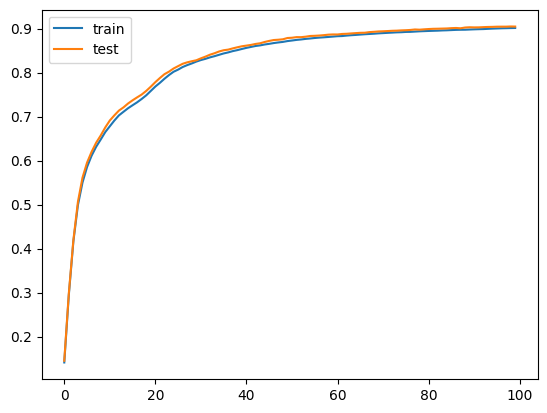

In [4]:
# 전체코드
import torch
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from torch import nn
from torch.optim import SGD
import numpy as np

transform = transforms.ToTensor()

trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)


testset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.ReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.layer3(x)

    return x

model = Model(28 * 28 * 1, 1024)
model = model.to('cuda')

# train
lr = 0.001
optimizer = SGD(model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

# Accuracy function
def accuracy(model, dataloader):
    cnt = 0
    acc = 0

    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to('cuda'), labels.to('cuda')

        preds = model(inputs)
        preds = torch.argmax(preds, dim=-1)

        cnt += labels.shape[0]
        acc += (labels == preds).sum().item()

    return acc / cnt



# Training loop
train_accs = []
test_accs = []

for epoch in range(100):
  total_loss = 0.
  model.train()
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  model.eval()
  train_acc = accuracy(model, trainloader)
  test_acc = accuracy(model, testloader)
  train_accs.append(train_acc)
  test_accs.append(test_acc)

  print(f"Epoch {epoch:3d} | Loss: {total_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

# Plotting function
def plot_acc(train_accs, test_accs, label1='train', label2='test'):
    x = np.arange(len(train_accs))

    plt.plot(x, train_accs, label=label1)
    plt.plot(x, test_accs, label=label2)
    plt.legend()
    plt.show()

plot_acc(train_accs, test_accs)

##[My Code] Test Data 준비하기
요구사항 1번인 test data 를 준비합니다

In [ ]:
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

## [My Code] nn.CrossEntropyLoss
CrossEntropyLoss 함수를 호출하여, 클래스 확률 예측에 대한 손실을 계산하게 하였습니다.
또한, 마지막 신경망에서 x = self.layer3(x) 원시 로짓을 출력층으로 전달하도록 수정합니다.

## [FEEDBACK]
CrossEntropyLoss도 단순히, 이게 이럴것이다 정도로는 알겠는데 정확히 내부적으로 어떻게 수치적으로 움직이는지 잘 이해를 못하겠습니다. 좀더 상세히 알기 위해서는 논문이나 내부 코드를 봐야 하는지. 혹은 경험이 있다면 어떤걸 추천하는지 궁금합니다.

In [ ]:
class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.ReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.layer3(x)

    return x

...

    loss = nn.CrossEntropyLoss()(preds, labels)

## [My Code] model의 train과 test data에 대한 정확도 plot하기
model.train()을 통해서, 드롭아웃과 배치 정규화 레이어가 학습 시 동작하도록 유도합니다.
model.eval()을 통해서, 평가모드로 전환하고 모든 피처들을 사용해 예측할수 있도록 유도합니다.

train_acc = accuracy(model, trainloader)
test_acc = accuracy(model, testloader)
train_accs.append(train_acc)
test_accs.append(test_acc)
각 정확도를 판별하고, 각 항목들의 정확도를 출력합니다.

In [ ]:
for epoch in range(100):
  total_loss = 0.
  model.train()
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    preds = model(inputs)
    loss = nn.CrossEntropyLoss()(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  model.eval()
  train_acc = accuracy(model, trainloader)
  test_acc = accuracy(model, testloader)
  train_accs.append(train_acc)
  test_accs.append(test_acc)

  print(f"Epoch {epoch:3d} | Loss: {total_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

##[LOG]
Epoch별 Traninset을 통해 학습한 모델의 Loss값과 Train 정확도, Test 정확도를 출력하는 Log입니다.

Epoch   0 | Loss: 538.6791 | Train Acc: 0.2069 | Test Acc: 0.2050<br/>
Epoch   1 | Loss: 534.9794 | Train Acc: 0.3141 | Test Acc: 0.3144<br/>
Epoch   2 | Loss: 531.1543 | Train Acc: 0.4136 | Test Acc: 0.4166<br/>
Epoch   3 | Loss: 527.0706 | Train Acc: 0.4755 | Test Acc: 0.4828<br/>
Epoch   4 | Loss: 522.6143 | Train Acc: 0.5313 | Test Acc: 0.5427<br/>
Epoch   5 | Loss: 517.6805 | Train Acc: 0.5775 | Test Acc: 0.5866<br/>
Epoch   6 | Loss: 512.1035 | Train Acc: 0.6085 | Test Acc: 0.6168<br/>
Epoch   7 | Loss: 505.7920 | Train Acc: 0.6281 | Test Acc: 0.6344<br/>
Epoch   8 | Loss: 498.5572 | Train Acc: 0.6442 | Test Acc: 0.6502<br/>
Epoch   9 | Loss: 490.2524 | Train Acc: 0.6589 | Test Acc: 0.6629<br/>
Epoch  10 | Loss: 480.7093 | Train Acc: 0.6715 | Test Acc: 0.6765<br/>
Epoch  11 | Loss: 469.7314 | Train Acc: 0.6827 | Test Acc: 0.6887<br/>
Epoch  12 | Loss: 457.1766 | Train Acc: 0.6926 | Test Acc: 0.6969<br/>
Epoch  13 | Loss: 442.9493 | Train Acc: 0.7013 | Test Acc: 0.7040<br/>
Epoch  14 | Loss: 427.0626 | Train Acc: 0.7096 | Test Acc: 0.7120<br/>
Epoch  15 | Loss: 409.6497 | Train Acc: 0.7171 | Test Acc: 0.7212<br/>
Epoch  16 | Loss: 390.8668 | Train Acc: 0.7232 | Test Acc: 0.7267<br/>
Epoch  17 | Loss: 371.1853 | Train Acc: 0.7296 | Test Acc: 0.7335<br/>
Epoch  18 | Loss: 350.9926 | Train Acc: 0.7373 | Test Acc: 0.7424<br/>
Epoch  19 | Loss: 330.8651 | Train Acc: 0.7469 | Test Acc: 0.7537<br/>
Epoch  20 | Loss: 311.4088 | Train Acc: 0.7578 | Test Acc: 0.7659<br/>
Epoch  21 | Loss: 292.9217 | Train Acc: 0.7690 | Test Acc: 0.7785<br/>
Epoch   0 | Loss: 538.6791 | Train Acc: 0.2069 | Test Acc: 0.2050<br/>
Epoch   1 | Loss: 534.9794 | Train Acc: 0.3141 | Test Acc: 0.3144<br/>
Epoch   2 | Loss: 531.1543 | Train Acc: 0.4136 | Test Acc: 0.4166<br/>
Epoch   3 | Loss: 527.0706 | Train Acc: 0.4755 | Test Acc: 0.4828<br/>
Epoch   4 | Loss: 522.6143 | Train Acc: 0.5313 | Test Acc: 0.5427<br/>
Epoch   5 | Loss: 517.6805 | Train Acc: 0.5775 | Test Acc: 0.5866<br/>
Epoch   6 | Loss: 512.1035 | Train Acc: 0.6085 | Test Acc: 0.6168<br/>
Epoch   7 | Loss: 505.7920 | Train Acc: 0.6281 | Test Acc: 0.6344<br/>
Epoch   8 | Loss: 498.5572 | Train Acc: 0.6442 | Test Acc: 0.6502<br/>
Epoch   9 | Loss: 490.2524 | Train Acc: 0.6589 | Test Acc: 0.6629<br/>
Epoch  10 | Loss: 480.7093 | Train Acc: 0.6715 | Test Acc: 0.6765<br/>
Epoch  11 | Loss: 469.7314 | Train Acc: 0.6827 | Test Acc: 0.6887<br/>
Epoch  12 | Loss: 457.1766 | Train Acc: 0.6926 | Test Acc: 0.6969<br/>
Epoch  13 | Loss: 442.9493 | Train Acc: 0.7013 | Test Acc: 0.7040<br/>
Epoch  14 | Loss: 427.0626 | Train Acc: 0.7096 | Test Acc: 0.7120<br/>
Epoch  15 | Loss: 409.6497 | Train Acc: 0.7171 | Test Acc: 0.7212<br/>
Epoch  16 | Loss: 390.8668 | Train Acc: 0.7232 | Test Acc: 0.7267<br/>
Epoch  17 | Loss: 371.1853 | Train Acc: 0.7296 | Test Acc: 0.7335<br/>
Epoch  18 | Loss: 350.9926 | Train Acc: 0.7373 | Test Acc: 0.7424<br/>
Epoch  19 | Loss: 330.8651 | Train Acc: 0.7469 | Test Acc: 0.7537<br/>
Epoch  20 | Loss: 311.4088 | Train Acc: 0.7578 | Test Acc: 0.7659<br/>
Epoch  21 | Loss: 292.9217 | Train Acc: 0.7690 | Test Acc: 0.7785<br/>
…<br/>
Epoch  93 | Loss: 84.7529 | Train Acc: 0.8999 | Test Acc: 0.9043<br/>
Epoch  94 | Loss: 84.2837 | Train Acc: 0.9001 | Test Acc: 0.9052<br/>
Epoch  95 | Loss: 83.8776 | Train Acc: 0.9002 | Test Acc: 0.9056<br/>
Epoch  96 | Loss: 83.6070 | Train Acc: 0.9003 | Test Acc: 0.9061<br/>
Epoch  97 | Loss: 83.2865 | Train Acc: 0.9009 | Test Acc: 0.9064<br/>
Epoch  98 | Loss: 82.9381 | Train Acc: 0.9012 | Test Acc: 0.9069<br/>
Epoch  99 | Loss: 82.7355 | Train Acc: 0.9019 | Test Acc: 0.9074<br/>

## [My Code] model의 train과 test data에 대한 정확도 plot하기
plot 결과를 출력합니다.


In [ ]:
# Plotting function
def plot_acc(train_accs, test_accs, label1='train', label2='test'):
    x = np.arange(len(train_accs))

    plt.plot(x, train_accs, label=label1)
    plt.plot(x, test_accs, label=label2)
    plt.legend()
    plt.show()

plot_acc(train_accs, test_accs)

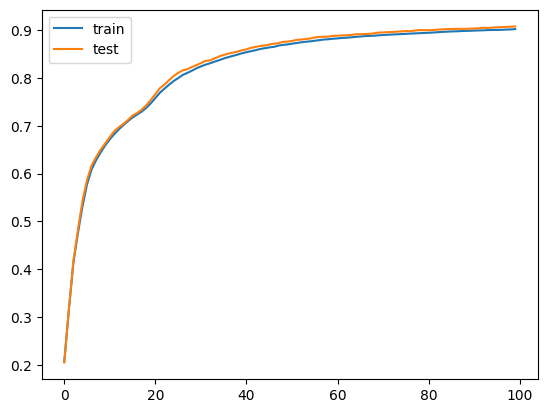